In [121]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/approaches-to-teaching-inventory/Approaches to Teaching.csv


# Background
**What problem do you solve?**

This project is aimed to identify Teaching Assistant's teaching and learning approach. According to Trigwell (2004), the Approaches to Teaching Inventory (ATI) was suggested to identify the teaching and learning style of a person. The ATI consist of 16 items (5 Likert scale) characterised by two approach: Conceptual Change/Student-focused Approach (CCSF) and Information Transmission/Teacher-focused Approach (ITTF). Particularly, they could be further classified by intentions and strategies for each approach. In an institution, the teaching assistants were invited to conduct the ATI before taking a professional development course. We are insterested in their teaching approaches before the course and any influence for their teaching demostration at the end of the course. 

This project is the first step: to classify the TA's teaching approach using ATI with Unsupervised Machine Learning. 





**What ML approach do you use, or what methods does your app use?**

Two Clustering methods are going to be used:

• K-means clustering

• hierarchical clustering

# Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data 
**Data Inspection**

In the raw data, we found 516 responses and 19 columns in total. There are null data in some features and wrong data type for *'Item 16'*. Meanwhile, the teaching experience and response ID is not related to this project objectives.

In [122]:
#import data file
data = pd.read_csv('/kaggle/input/approaches-to-teaching-inventory/Approaches to Teaching.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Response ID                   516 non-null    object 
 1   Prior Teaching Experience     516 non-null    int64  
 2   Years of Teaching Experience  117 non-null    float64
 3   Item 1                        512 non-null    float64
 4   Item 2                        512 non-null    float64
 5   Item 3                        512 non-null    float64
 6   Item 4                        512 non-null    float64
 7   Item 5                        512 non-null    float64
 8   Item 6                        512 non-null    float64
 9   Item 7                        512 non-null    float64
 10  Item 8                        512 non-null    float64
 11  Item 9                        511 non-null    float64
 12  Item 10                       511 non-null    float64
 13  Item 

**Clean Data**

Hence, The *'Response ID'* , *'Prior Teaching Experience'* and *'Years of Teaching Experience'* will be removed. Change the *'Item 16'* to float. The null data will be filled by mean. 

Meanwhile, we are going to sum-up the items for ITTF and CCSF score which reflect respondents' degree of teaching approaches. In order to further inspect the data, to simply, higher score for the teaching approach be labeled (if IITF score greater than CCSF, the respondent will be labeled as *'ITTF'*). If the scores are the same, it will be labeled as *'Neutral'* . Please note that there is no thresold for the orginal ATI design.  

The action code and result are as below:

In [123]:
#drop unnecessary features 
clean_data = data.drop(columns=['Response ID','Prior Teaching Experience', 'Years of Teaching Experience'], axis=1)
#modify data type  
clean_data['Item 16'] = clean_data['Item 16'].astype(float)
#fill mean to null cell
clean_data.fillna(clean_data.mean(), inplace=True)

#calculate CCSF
Intention_for_CCSF = clean_data['Item 5']+clean_data['Item 8']+clean_data['Item 15']+clean_data['Item 16']
Strategy_for_CCSF = clean_data['Item 3']+clean_data['Item 6']+clean_data['Item 9']+clean_data['Item 14']
CCSF = Intention_for_CCSF+Strategy_for_CCSF

#calculate ITTF
Intention_for_ITTF = clean_data['Item 2']+clean_data['Item 4']+clean_data['Item 11']+clean_data['Item 13']
Strategy_for_ITTF = clean_data['Item 1']+clean_data['Item 7']+clean_data['Item 10']+clean_data['Item 12']
ITTF = Intention_for_ITTF+Strategy_for_ITTF

clean_data.info()

#label the teaching apporach
label = []
count_label=[0,0,0]
for n in range(len(CCSF)):
    if ITTF[n]>CCSF[n]:
        label.append('ITTF')
        count_label[0]+=1
    elif ITTF[n]==CCSF[n]:
        label.append('Neutral')
        count_label[1]+=1
    else:
        label.append('CCSF')
        count_label[2]+=1
        
print("First 20 Label: ",label[:20])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Item 1   516 non-null    float64
 1   Item 2   516 non-null    float64
 2   Item 3   516 non-null    float64
 3   Item 4   516 non-null    float64
 4   Item 5   516 non-null    float64
 5   Item 6   516 non-null    float64
 6   Item 7   516 non-null    float64
 7   Item 8   516 non-null    float64
 8   Item 9   516 non-null    float64
 9   Item 10  516 non-null    float64
 10  Item 11  516 non-null    float64
 11  Item 12  516 non-null    float64
 12  Item 13  516 non-null    float64
 13  Item 14  516 non-null    float64
 14  Item 15  516 non-null    float64
 15  Item 16  516 non-null    float64
dtypes: float64(16)
memory usage: 64.6 KB
First 20 Label:  ['ITTF', 'ITTF', 'ITTF', 'ITTF', 'ITTF', 'ITTF', 'ITTF', 'ITTF', 'ITTF', 'ITTF', 'ITTF', 'ITTF', 'ITTF', 'CCSF', 'Neutral', 'CCSF', 'ITTF', 'ITTF', 'CCS

**Visualize**

Afterwards, we are going to look into the statistics description of the features and label. 

It showed that the CCSF and ITTF are about normal distribution. The mean and mode score for ITTF slightly higher than the CCSF which indicates the respondents more tend to ITTF than CCSF. The pie chart of label also showed the phenomenon. Majority of respondents are ITTF. Similar number of respondents are neutral and CCSF. 

In the scatter plot, we could not found significant cluster. That also indicate that the respondents have high similarity. As well as, there was a outliner found.  

Text(0, 0.5, 'Count')

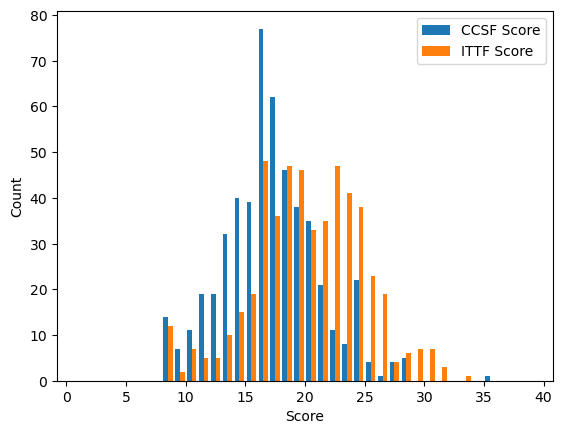

In [124]:
import matplotlib.pyplot as plt
#show histrogram for CCSF and ITTF score
bins = np.arange(1, 40)
plt.hist([CCSF, ITTF], bins, label=['CCSF Score', 'ITTF Score'])
plt.legend(loc='upper right')
plt.xlabel('Score')
plt.ylabel('Count')

([<matplotlib.patches.Wedge at 0x7be96dff80a0>,
 [Text(-0.5207500025671069, 0.9689269502012823, 'ITTF'),
  Text(-0.1601611565512195, -1.0882777237140233, 'Neutral'),
  Text(0.882779751745308, -0.6562773117429038, 'CCSF')])

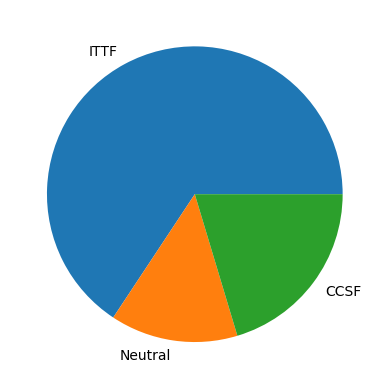

In [125]:
#show pie chart for teaching appoarch label
plt.pie(count_label, labels = ['ITTF','Neutral','CCSF'])

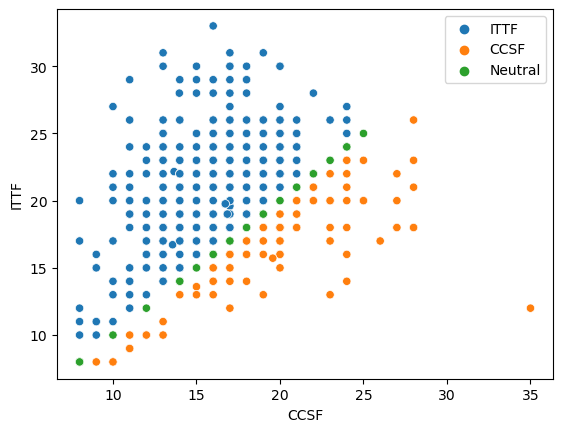

In [126]:
import seaborn as sns
#show scatterplot of label
sns.scatterplot(x = CCSF, y =ITTF, marker = "o", hue = label,legend='full')
plt.xlabel('CCSF')
plt.ylabel('ITTF')
plt.legend(loc='upper right')

for n in range(len(CCSF)):
    if CCSF[n]>34:
        clean_data.drop(index=n, inplace=True)
        CCSF.drop(index=n, inplace=True)
        ITTF.drop(index=n, inplace=True)
        label.pop(n)

Text(0.5, 1.0, 'Scatter Plot After Removing Outliner')

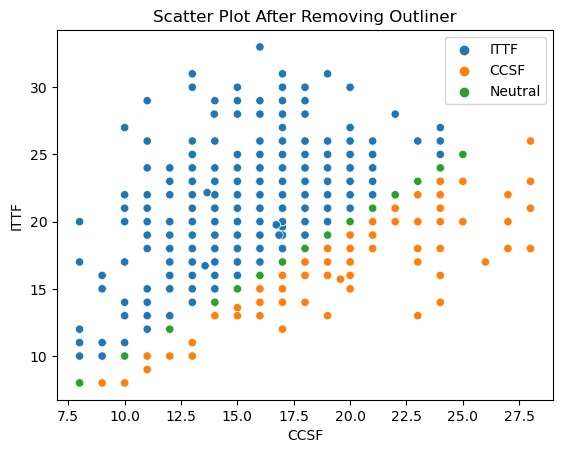

In [127]:
#show scatterplot of label after removing outliner
sns.scatterplot(x = CCSF, y =ITTF, marker = "o", hue = label,legend='full')
plt.xlabel('CCSF')
plt.ylabel('ITTF')
plt.legend(loc='upper right')
plt.title('Scatter Plot After Removing Outliner')

**For each features (Item 1 to 16)**, most of the items returns low mean score and no items has mean higher than 3.6. Although they are low scoring, they showed different distribution.

In the pair plot, we did not find significant correlation between the features or with the CCSF and ITTF score. However, we do see the features has different pattern for each label. 

(array([[108.,   0., 237.,   4.,   0., 104.,   0.,  46.,   0.,  16.],
        [151.,   0., 242.,   0.,   0.,  68.,   0.,  43.,   0.,  11.],
        [235.,   4., 213.,   0.,   0.,  43.,   0.,  18.,   0.,   2.],
        [156.,   0., 220.,   0.,   0., 106.,   0.,  30.,   0.,   3.],
        [195.,   4., 259.,   0.,   0.,  48.,   0.,   8.,   0.,   1.],
        [176.,   0., 233.,   0.,   0.,  71.,   0.,  34.,   0.,   1.],
        [109.,   0., 242.,   4.,   0.,  99.,   0.,  56.,   0.,   5.],
        [235.,   4., 218.,   0.,   0.,  55.,   0.,   3.,   0.,   0.],
        [ 43.,   0., 134.,   0.,   0., 131.,   0., 150.,   0.,  57.],
        [ 89.,   0., 248.,   5.,   0., 117.,   0.,  43.,   0.,  13.],
        [ 78.,   0., 184.,   5.,   0., 153.,   0.,  80.,   0.,  15.],
        [ 29.,   0.,  76.,   0.,   0.,  93.,   7., 179.,   0., 131.],
        [ 82.,   0., 177.,   0.,   7.,  95.,   0., 108.,   0.,  46.],
        [127.,   0., 295.,   0.,   0.,  75.,   0.,  18.,   0.,   0.],
        [234.,   7.,

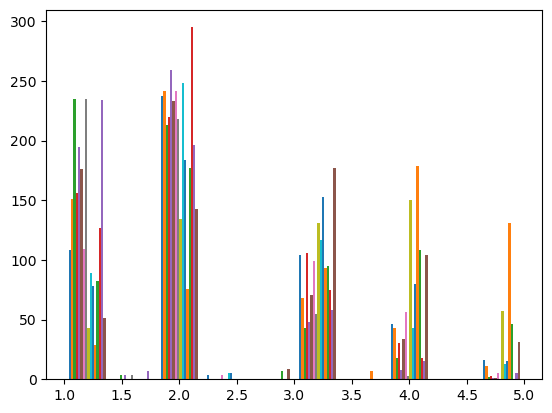

In [128]:
#show histrogram for each features
plt.hist(clean_data)

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


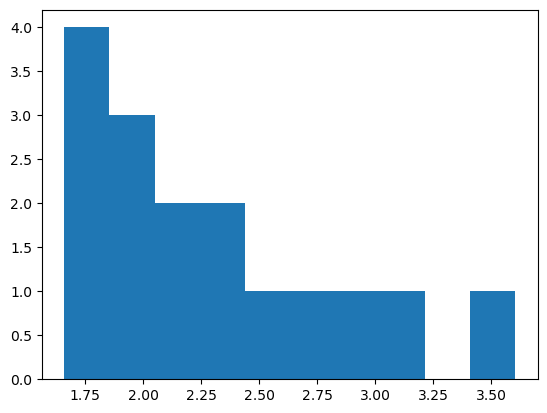

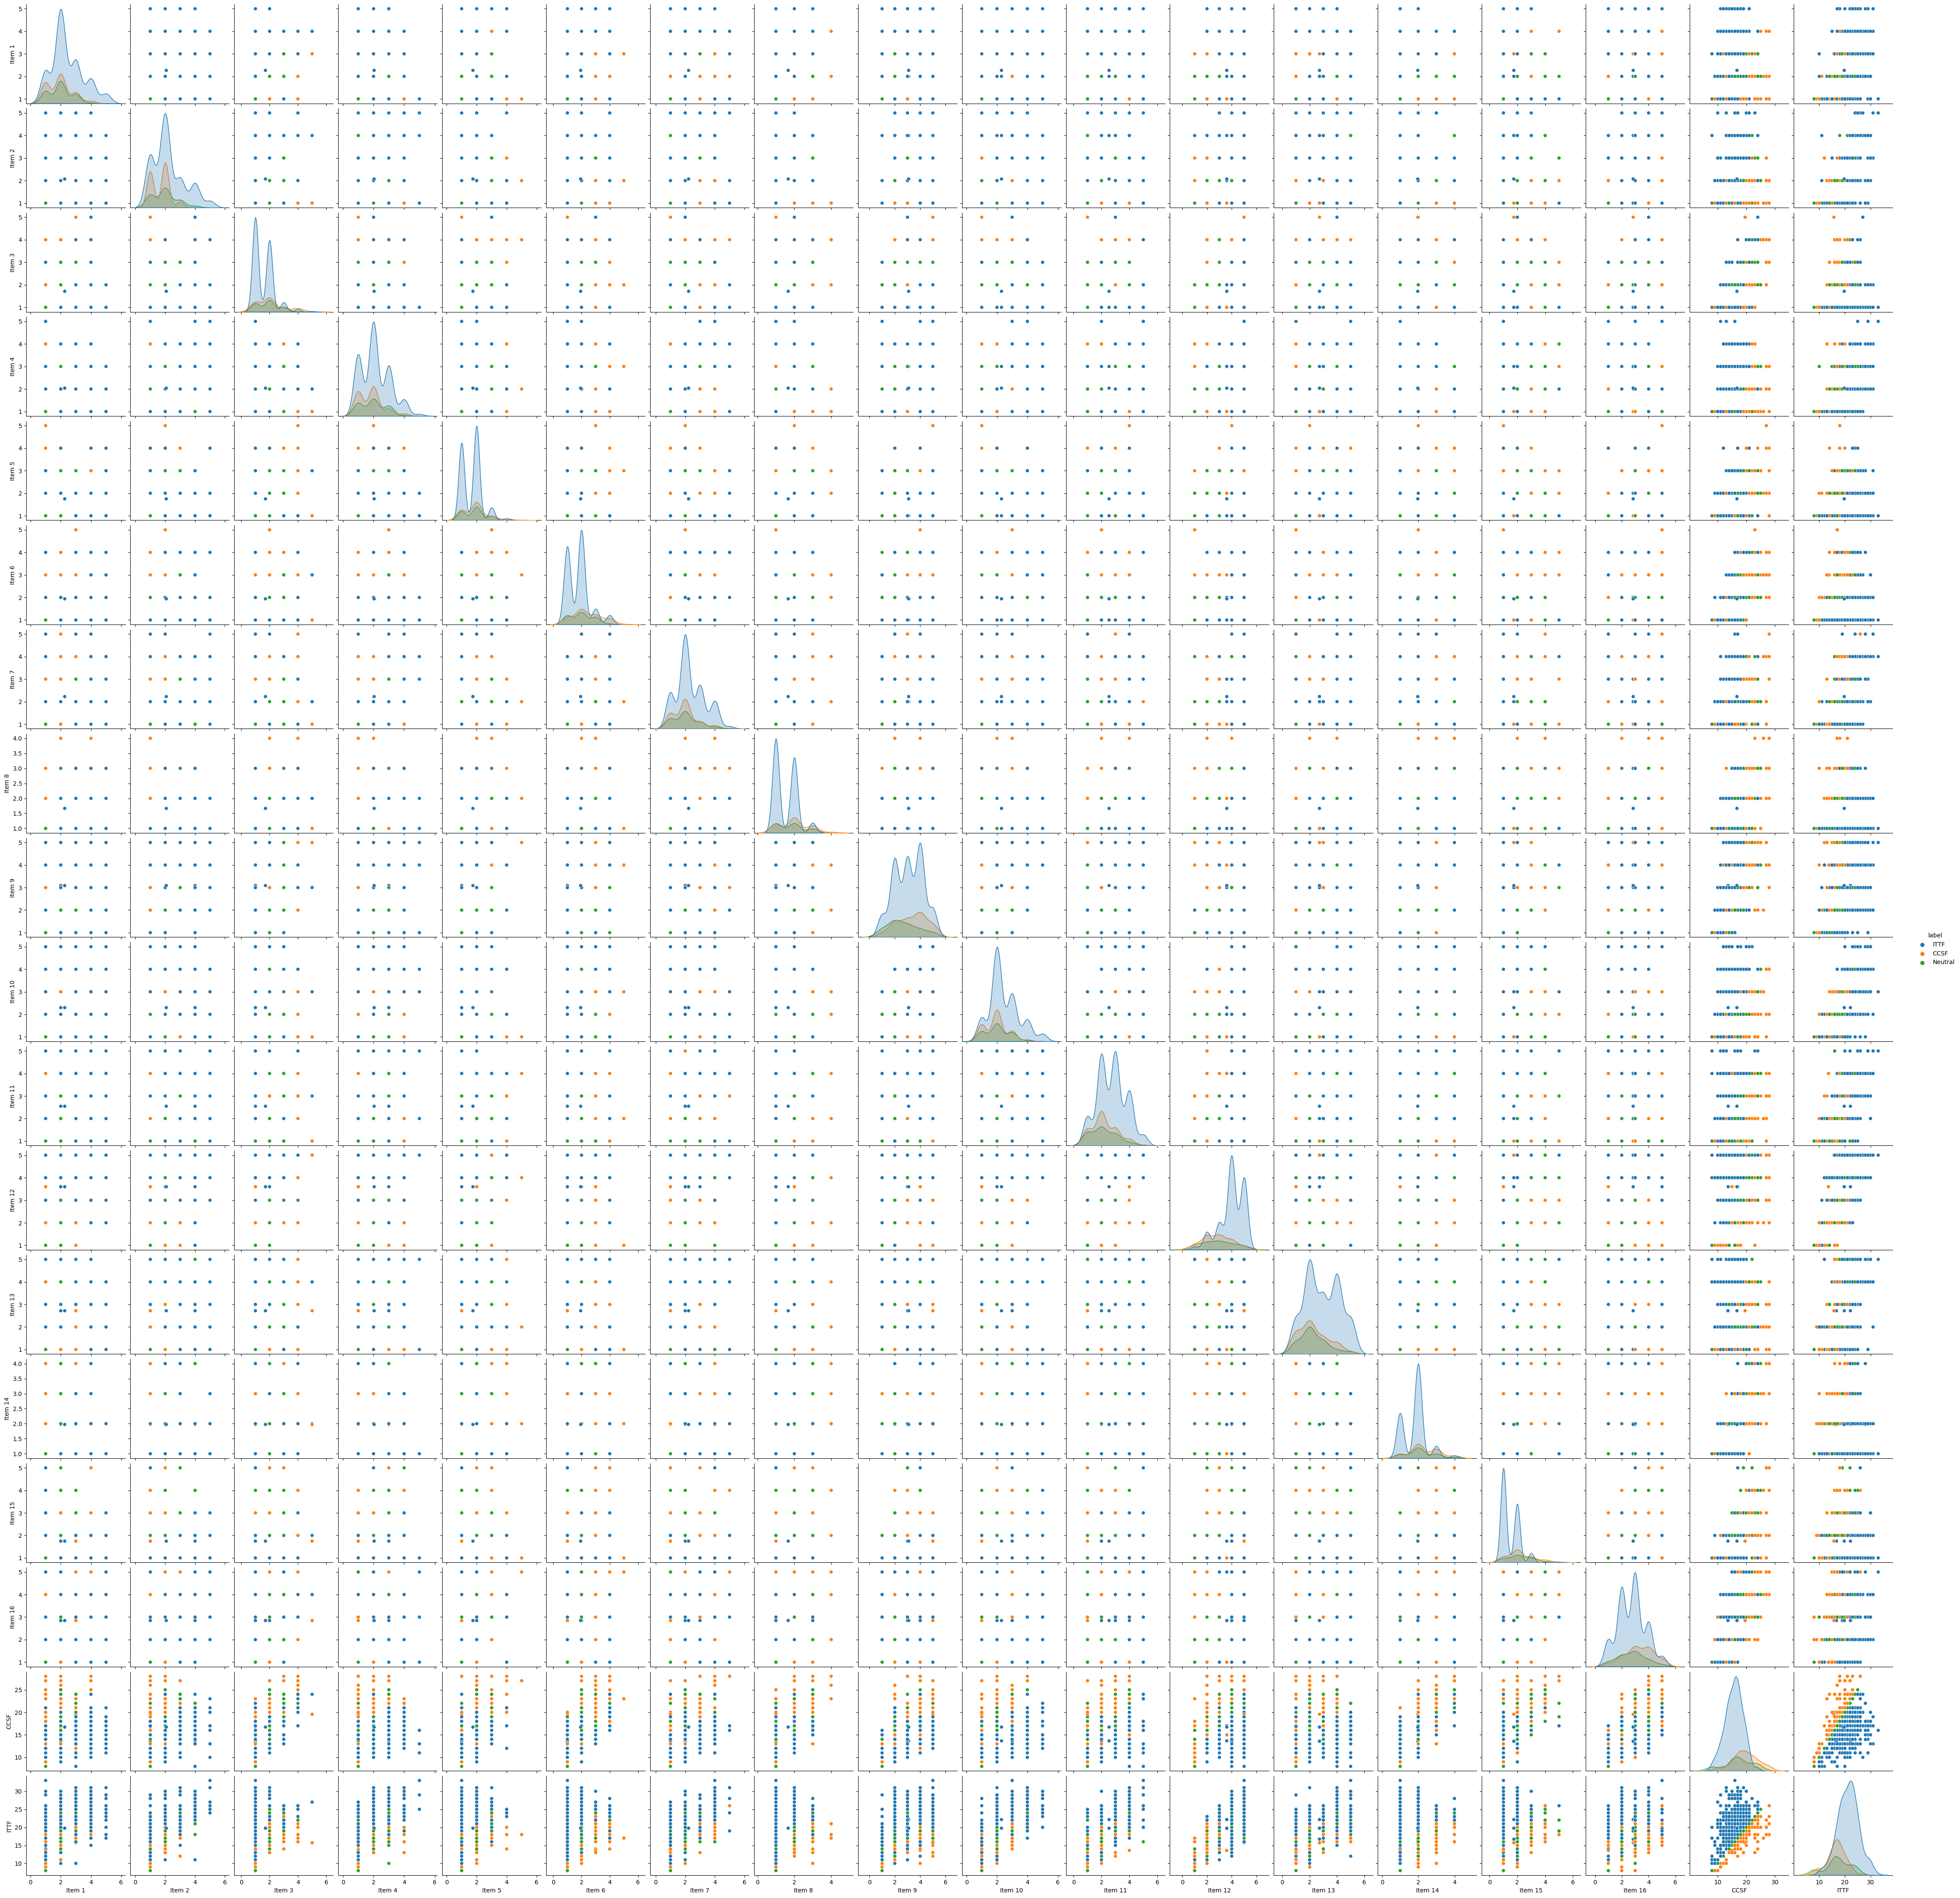

In [129]:
#show correlation for each features and label
plt.hist(np.mean(clean_data))
plot_data = clean_data.copy()
plot_data['label']=label
plot_data['CCSF']=CCSF
plot_data['ITTF']=ITTF
sns.pairplot(plot_data,hue="label")

**PCA Analysis**

Considering some items in ATI may not be significant in this dataset, PCA analysis is conducted. We can see the all items equally explain the data. So we keep all items, and obtain the k mean clustering

Explained Variance Ratio:  [0.24316351 0.3810868  0.47057762 0.54491845 0.61132049 0.66893078
 0.72009577 0.7635306  0.8067318  0.84688257 0.8798234  0.91064254
 0.9383113  0.96229804 0.98307835 1.        ]


([<matplotlib.axis.XTick at 0x7be95b783e80>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15')])

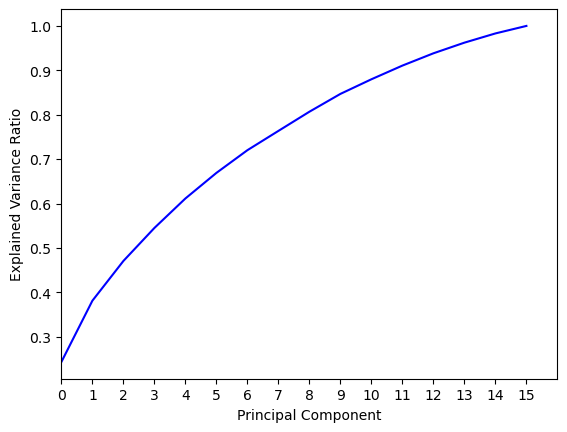

In [130]:
# PCA Anaylsis
from sklearn.decomposition import PCA

pca = PCA(n_components=16)
pca.fit_transform(clean_data)
print('Explained Variance Ratio: ',pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), 'b-')
plt.xlim(0, 16)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(0, 16))

# Analysis 
**K-means clustering**

We start build the K-means clustering model. Since we originally have 3 types of label in this case (ITTF, CCSF and Neutral), the initial number of cluster is set to 3. 

As a result, the scatterplot showed that the clustering was able to identify the teaching approach. It classify three level of teaching approach degree (low score on both sides, high CCSF-low ITTF, and high ITTF-low CCSF). We could clearly see the ITTF class with cluster='1' and CCSF class with cluster='2'. However, there were few overlapping.


Text(0, 0.5, 'ITTF')

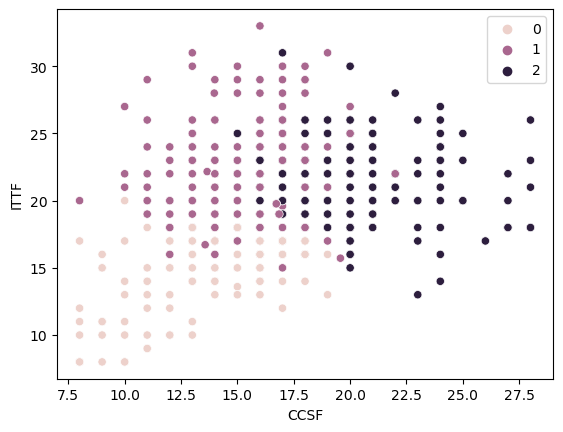

In [142]:
import time
excution_time=[]

from sklearn.cluster import KMeans
#clean_data.info()
#build k-means model
start = time.time()
kmeans_3 = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(clean_data)
stop = time.time()
excution_time.append(stop-start)
y_kmeans_3 = kmeans_3.predict(clean_data)
y_kmeans_3

#show scatterplot of predicted cluster
sns.scatterplot(x = CCSF, y =ITTF, marker = "o", hue = y_kmeans_3,legend='full')
plt.xlabel('CCSF')
plt.ylabel('ITTF')

To find the better preformance, we use distortion (the mean of square distance) as metrics to find the optimal number of cluster k. According to the Elbow Method, the optimal number of cluster is k=9. As there are too much clusters for the teaching approaches theory. It may indicate that the k means does not appropriate to these theory.  

Despite this, we build a k mean for k=9. It was unable to identify clusters strongly, but two clusters are about to show the ITTF and CCSF respondents.

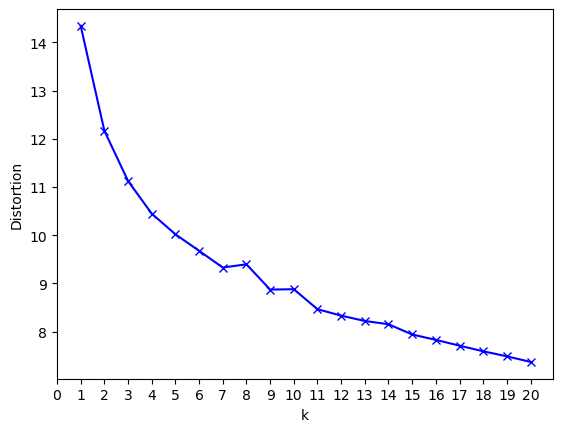

Text(0, 0.5, 'ITTF')

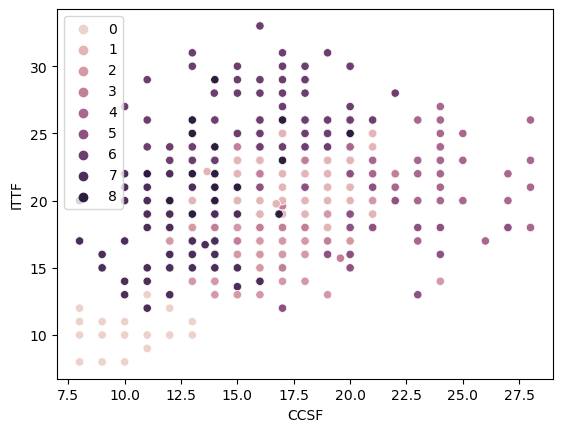

In [143]:
#finding the optimal number for clustering using elbow method
distortions = []
K = range(1,21)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(clean_data)
    distortions.append(kmeans.inertia_ / clean_data.shape[0])
    
#show the distortions for each number of cluster
plt.plot(K, distortions, 'bx-')
plt.xticks(np.arange(0, 21))
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

#build k-means model
start = time.time()
kmeans = KMeans(n_clusters=9, random_state=0, n_init="auto").fit(clean_data)
stop = time.time()
excution_time.append(stop-start)
y_kmeans = kmeans.predict(clean_data)
y_kmeans

#show scatterplot of predicted cluster
sns.scatterplot(x = CCSF, y =ITTF, marker = "o", hue = y_kmeans,legend='full')
plt.xlabel('CCSF')
plt.ylabel('ITTF')

**hierarchical clustering**

We start build the hierarchical clustering model. Similarly, we set the number of cluster as 3 in initial and build another model with thresold to compare. The thresold will be the maximunm distance of hierarchical clustering model with 3 cluster. Let it be the based line. 

As the data are very close to each others, complete linkage will be used. 

Since there are 16 items which is high dimension dataset, Manhattan distance is preferred as the metric of hierarchical clustering.

Unfortunately, the scatterplot showed that the hierarchical clustering (both number of cluster and distance thresold) were worse than k means as many ovrlapping and did not identify any teaching approach. It barely show the cluster with very high CCSF/ITTF score.

<Axes: >

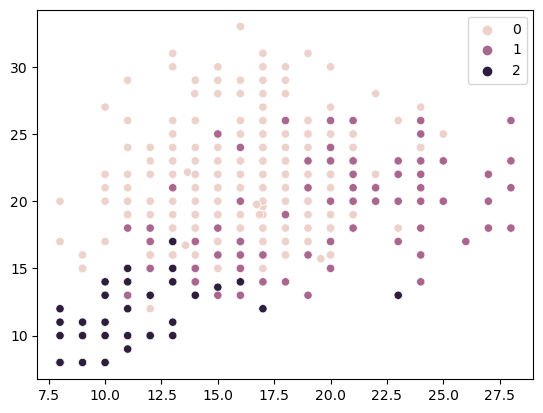

In [144]:
from sklearn.cluster import AgglomerativeClustering
#build hierarchical clustering model with 3 clusters
start = time.time()
hierarchy_3 = AgglomerativeClustering(n_clusters=3, metric='manhattan', linkage='complete', compute_distances=True).fit(clean_data)
stop = time.time()
excution_time.append(stop-start)
y_hierarchy_3 = hierarchy_3.labels_

sns.scatterplot(x = CCSF, y =ITTF, marker = "o", hue = y_hierarchy_3,legend='full')

39.0


<Axes: >

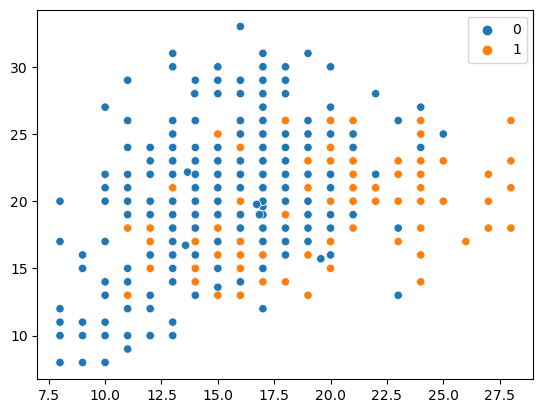

In [145]:
#build hierarchical clustering model with thresold 
thresold=np.max(hierarchy_3.distances_)
print(thresold)
start = time.time()
hierarchy = AgglomerativeClustering(n_clusters=None, distance_threshold=thresold, metric='manhattan', linkage='complete').fit(clean_data)
stop = time.time()
excution_time.append(stop-start)
y_hierarchy = hierarchy.labels_

sns.scatterplot(x = CCSF, y =ITTF, marker = "o", hue = y_hierarchy,legend='full')

# Discussion
As a result, the k-means worked better than the hierarchical. It might because it is high dimension dataset and the similarity of the respondents are high. 

Comparing the excution time, the k means is faster than the hierarchical. 
 
In the future, we could try more hyperparameter optimization for the clustering, such as ward, average linkage and other metrics. And also find a better thresold.

In [146]:
print(f"KMeans(3 Cluster) Training time: {excution_time[0]}s")
print(f"KMeans(9 Cluster) Training time: {excution_time[1]}s")
print(f"Hierarchical(3 Cluster) Training time: {excution_time[2]}s")
print(f"Hierarchical(Thresold) Training time: {excution_time[3]}s")

KMeans(3 Cluster) Training time: 0.012963294982910156s
KMeans(9 Cluster) Training time: 0.00989675521850586s
Hierarchical(3 Cluster) Training time: 0.01156163215637207s
Hierarchical(Thresold) Training time: 0.01202535629272461s
